In [1]:
import os
import struct
import random
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
with open("train-labels.idx1-ubyte", 'rb') as flbl:
    magic, num = struct.unpack(">II", flbl.read(8))
    lbl = np.fromfile(flbl, dtype=np.int8)

with open("train-images.idx3-ubyte", 'rb') as fimg:
    magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
    img_view = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl),rows,cols)
    
img = img_view.reshape(len(lbl),rows*cols)
idx = np.random.randint(60000, size=6000)
img = img[idx,:]
lbl = lbl[idx]
img = img/255.0
NUM_OF_DATA = len(img)
img = np.concatenate((np.ones((1,NUM_OF_DATA)), img.T)).T


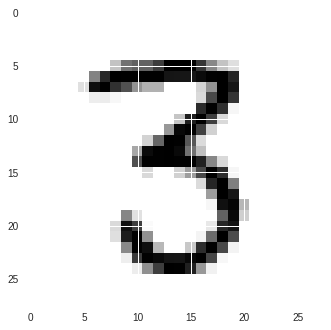

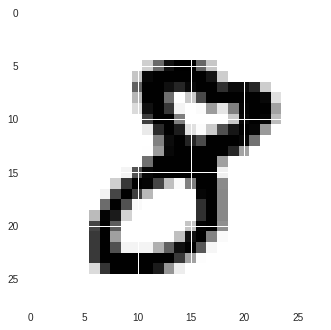

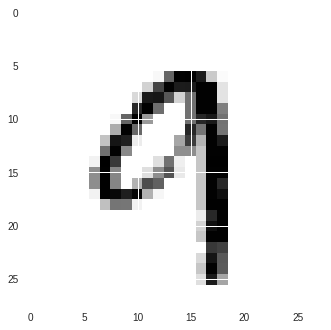

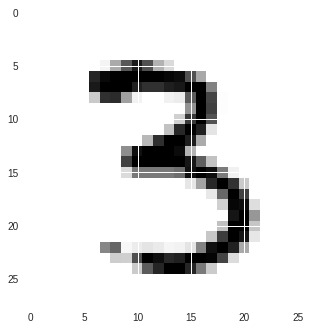

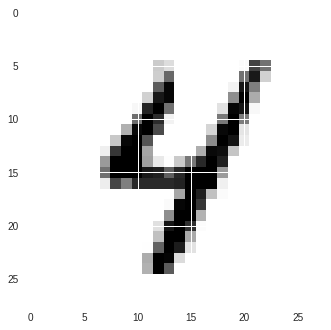

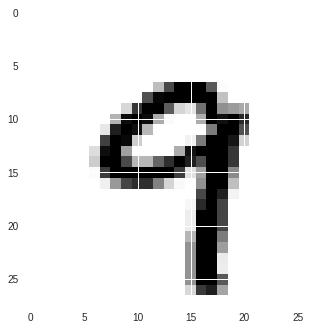

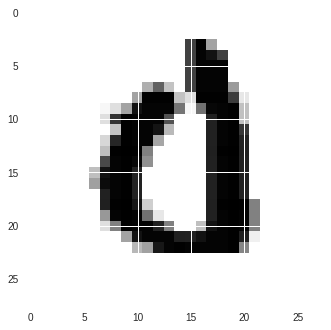

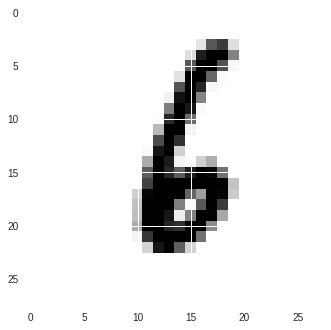

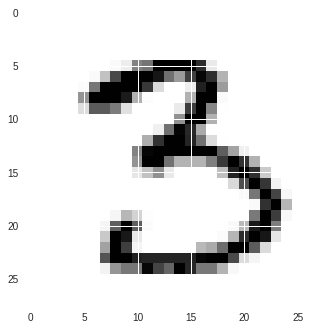

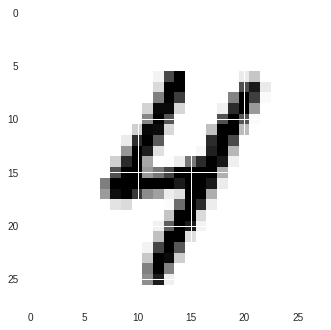

In [3]:
idx = np.random.randint(60000, size=10)
rand_arr = img_view[idx,:]
for i in range(0,10):
    plt.imshow(rand_arr[i], cmap='gray_r')
    plt.show()

In [4]:
alpha = 0.8
max_it = 1500
landa = 0.000001
theta_vals = []

In [5]:
def sigmoid(z):  
    return 1 / (1 + np.exp(-z))

In [6]:
def cost(theta, X, y):
    m = NUM_OF_DATA
    first = np.multiply(-y, np.log(sigmoid(np.dot(X , theta.T))))
    second = np.multiply((1 - y), np.log(1 - sigmoid(np.dot(X , theta.T))))
    reg = (landa / 2 * len(X)) * np.sum(np.power(theta, 2))
    return np.sum(first - second) / (len(X)) + reg

In [7]:
def gradient(theta, X, y):  
    parameters = len(X[0])
    grad = np.zeros(parameters)
    error = sigmoid(np.dot(X,theta.T)) - y
    m = NUM_OF_DATA
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        if (i == 0):
            grad[i] = np.sum(term) / m
        else:
            grad[i] = (np.sum(term) / m) + ((landa / m) * theta[i])
    return grad

In [8]:
def classification(x,y):
    m = len(x)
    n = len(x[0])
    theta = np.zeros(n)
    count_it = 0
    J = []
    while count_it < max_it :
        count_it += 1
        if count_it % 100 == 0:
            print count_it
        npd = np.dot(x , theta)
        npde = np.exp(-npd)
        h = 1./(1 + npde)
        j = cost(theta,x,y)
        g = gradient(theta,x,y)
        theta = theta - alpha * g
        J.append(j)
    return theta

In [9]:
def create_lable(lable_val , lables):
    return np.array([int (x==lable_val) for x in lables])

In [10]:
def one_vs_all_classification(k):
    for i in range(0,k):
        print "------",i
        y = create_lable(i,lbl)
        theta = classification(img , y)
        theta_vals.append(theta)

In [11]:
one_vs_all_classification(10)
print theta_vals

------ 0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
------ 1
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
------ 2
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
------ 3
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
------ 4
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
------ 5
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
------ 6
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
------ 7
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
------ 8
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
------ 9
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
[array([ -2.54444008e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
     

In [19]:
theta = np.array(theta_vals)
print theta.shape

(10, 785)


In [26]:
with open("t10k-labels.idx1-ubyte", 'rb') as flbl:
    magic, num = struct.unpack(">II", flbl.read(8))
    lbl_test = np.fromfile(flbl, dtype=np.int8)

with open("t10k-images.idx3-ubyte", 'rb') as fimg:
    magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
    img_test_view = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl_test),rows,cols)
    img_test = img_test_view.reshape(len(lbl_test),rows*cols)

img_test = img_test/255.
img_test = np.concatenate((np.ones((1,len(lbl_test))), img_test.T)).T

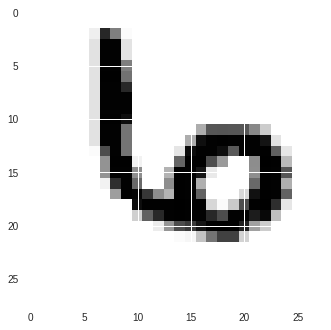

predicted probability for value  0  is:  5.00086567538e-07
predicted probability for value  1  is:  1.53665918978e-05
predicted probability for value  2  is:  0.00180690607504
predicted probability for value  3  is:  2.4085473404e-07
predicted probability for value  4  is:  0.0899070687081
predicted probability for value  5  is:  3.62560497463e-08
predicted probability for value  6  is:  0.991017459213
predicted probability for value  7  is:  0.000343194875455
predicted probability for value  8  is:  0.00137886329875
predicted probability for value  9  is:  5.16035194835e-05
---
predicted value is:  6
real value is:  6


In [35]:
idx_test = random.randint(0,len(lbl_test))
plt.imshow(img_test_view[idx_test], cmap='gray_r')
plt.show()
          
ans = sigmoid(np.dot(theta,img_test[idx_test].T))
for i in range(0,10):
    print "predicted probability for value ",i," is: ",ans[i]
print "---"
print "predicted value is: " , ans.argmax()
print "real value is: ",lbl_test[idx_test]